<a href="https://colab.research.google.com/github/JulioHenri/cliente_marcos/blob/main/cliente_area_da_saude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contexto

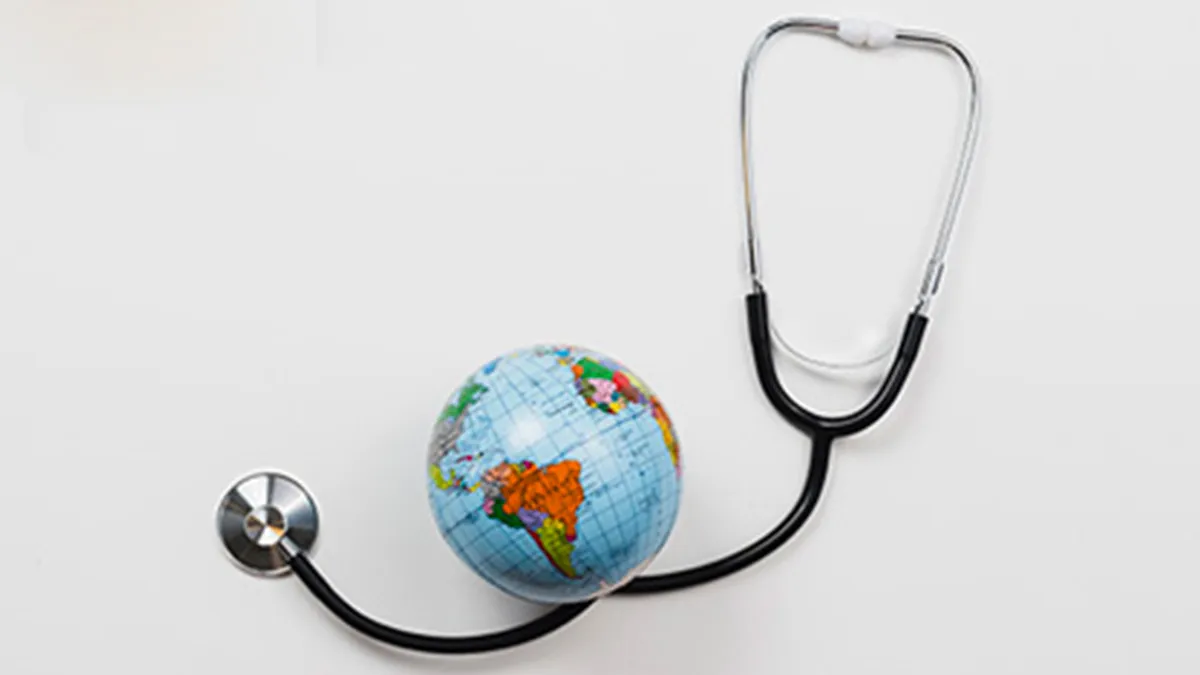

Epidemiologia pode ser definida como a “ciência que estuda o processo saúde-doença em coletividades humanas, analisando a distribuição e os fatores determinantes das enfermidades, danos à saúde e eventos associados à saúde coletiva, propondo medidas específicas de prevenção, controle ou erradicação de doenças, e fornecendo indicadores que sirvam de suporte ao planejamento, administração e avaliação das ações de saúde” (ROUQUAYROL e GOLDBAUM, 2003).

Além disso, a epidemiologia é intimamente relacionada com a estatística, logo, é comumente utilizado de técnicas e métodos estatísticos para fazer a análise de dados epidemiológicos. O estudo em questão tem como objetivo analisar as variáveis, obter insights, problematizar, aplicar um modelo de Machine Learning e avaliá-lo. 

# Carregando libs

In [ ]:
import pandas as pd
import numpy as np

import scipy.stats as stats


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Carregando dados

In [ ]:
df = pd.read_csv('Banco_avaliação_1.csv', sep=';')
df.head()

,Pront+A1:Q146uario,idade,Passado de malária,Est.Civ.,Renda salario mínimo,Malárias,Gesta,Paridade,Trimestre,Hemoglob.,Hematóc,Plaquetas,Colester,Triglic,LDL,HDL,VLDL
0,13942,17,Vivax,u e,1,0,3,2,3,7.9,27.1,144,286,235,186,65,47
1,79078,24,vivax e falciparum,u e,2,2,3,2,3,10.0,32.9,274,188,220,82,71,44
2,28811,29,vivax,cas,1,2,7,6,2,10.8,35.6,258,233,136,154,57,27
3,24600,40,Mista,u e,1,3,12,11,3,10.4,33.9,169,196,192,98,64,38
4,18582,17,falciparum,solt,2,1,1,0,3,13.3,38.4,296,163,340,56,46,68
5,5181,30,vivax,cas,1,1,3,1,3,11.2,37.1,204,211,345,80,52,69
6,10156,23,vivax,cas,2,1,4,3,3,11.6,37.1,137,158,225,80,33,45
7,35334,18,vivax,u e,1,2,2,1,2,12.5,24.2,675,220,195,123,62,39
8,9370,28,vivax,u e,1,1,5,4,3,10.4,33.0,231,204,190,128,48,38
9,36055,20,vivax,u e,1,1,1,0,3,10.1,31.6,164,276,568,121,54,114


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Pront+A1:Q146uario    117 non-null    object 
 1   idade                 118 non-null    int64  
 2   Passado de malária    116 non-null    object 
 3   Est.Civ.              118 non-null    object 
 4   Renda salario mínimo  118 non-null    int64  
 5   Malárias              118 non-null    int64  
 6   Gesta                 118 non-null    int64  
 7   Paridade              118 non-null    int64  
 8   Trimestre             118 non-null    int64  
 9   Hemoglob.             118 non-null    float64
 10  Hematóc               118 non-null    float64
 11  Plaquetas             118 non-null    int64  
 12  Colester              118 non-null    int64  
 13  Triglic               118 non-null    int64  
 14  LDL                   118 non-null    int64  
 15  HDL                   1

#Análise descritiva

##Classifique as variáveis

In [ ]:
df.columns

Index(['Pront+A1:Q146uario', 'idade', 'Passado de malária', 'Est.Civ.',
       'Renda salario mínimo', 'Malárias', 'Gesta', 'Paridade', 'Trimestre',
       'Hemoglob.', 'Hematóc', 'Plaquetas', 'Colester', 'Triglic', 'LDL',
       'HDL', 'VLDL'],
      dtype='object')

'Pront+A1:Q146uario': valor ID, não classificável
'idade': Quantitativa discreta
'Passado de malária': Qualitativa nominal
'Est.Civ.': Qualitativa nominal
'Renda salario mínimo': Quantitativa discreta
'Malárias': Quantitativa discreta
'Gesta': Quantitativa discreta
'Paridade': Quantitativa discreta
'Trimestre': Qualitativa ordinal
'Hemoglob.': Quantitativa contínua
'Hematóc': Quantitativa contínua
'Plaquetas': Quantitativa discreta
'Colester': Quantitativa discreta
'Triglic': Quantitativa discreta
'LDL': Quantitativa discreta
'HDL': Quantitativa discreta
'VLDL': Quantitativa discreta

##Corrigindo inconsistências no dataset

In [ ]:
df['Passado de malária'].unique() #há alguns valores escritos diferentes que se referem a mesma coisa

array(['Vivax', 'vivax e falciparum', 'vivax ', 'Mista ', ' falciparum',
       'vivax', 'falciparum', nan], dtype=object)

In [ ]:
df['Passado de malária'].replace('vivax e falciparum','Mista ', inplace = True)
df['Passado de malária'].replace('Vivax','vivax', inplace = True)
df['Passado de malária'].replace('vivax ','vivax', inplace = True)
df['Passado de malária'].replace(' falciparum','falciparum', inplace = True)


In [ ]:
df['Passado de malária'].unique()

array(['vivax', 'Mista ', 'falciparum', nan], dtype=object)

In [ ]:
df['Est.Civ.'].unique() #a mesma coisa acontece para estado civil

array(['u e', 'cas', 'solt', 'u e '], dtype=object)

In [ ]:
df['Est.Civ.'].replace('u e ','União Estável', inplace = True)
df['Est.Civ.'].replace('u e','União Estável', inplace = True)
df['Est.Civ.'].replace('solt','Solteiro', inplace = True)
df['Est.Civ.'].replace('cas','Casado', inplace = True)

In [ ]:
df['Est.Civ.'].unique() #a mesma coisa acontece para estado civil

array(['União Estável', 'Casado', 'Solteiro'], dtype=object)

##Apresentação das variáveis qualitativas

In [ ]:
qualitativas = df[['Passado de malária','Est.Civ.','Trimestre']].copy()
qualitativas.head(10)

,Passado de malária,Est.Civ.,Trimestre
0,vivax,União Estável,3
1,Mista,União Estável,3
2,vivax,Casado,2
3,Mista,União Estável,3
4,falciparum,Solteiro,3
5,vivax,Casado,3
6,vivax,Casado,3
7,vivax,União Estável,2
8,vivax,União Estável,3
9,vivax,União Estável,3


###tabela de frequência

In [ ]:
qualitativas['Trimestre'] = qualitativas.Trimestre.astype(object) #mudando o tipo da variável

In [ ]:
freq1 = qualitativas['Passado de malária'].value_counts()
percent1 = qualitativas['Passado de malária'].value_counts(normalize=True).round(4)*100

dist1 = pd.DataFrame({'Frequência': freq1,
                      'Porcentagem (%)': percent1})
dist1 = dist1.rename_axis('Passado de malária', axis= 'columns')
dist1

Passado de malária,Frequência,Porcentagem (%)
vivax,96,82.76
falciparum,15,12.93
Mista,5,4.31


In [ ]:
freq2 = qualitativas['Est.Civ.'].value_counts()
percent2 = qualitativas['Est.Civ.'].value_counts(normalize=True).round(4)*100

dist2 = pd.DataFrame({'Frequência': freq2,
                      'Porcentagem(%)': percent2})
dist2 = dist2.rename_axis('Estado Civil', axis= 'columns')
dist2

Estado Civil,Frequência,Porcentagem(%)
União Estável,62,52.54
Casado,35,29.66
Solteiro,21,17.80


In [ ]:
freq3 = qualitativas['Trimestre'].value_counts()
percent3 = qualitativas['Trimestre'].value_counts(normalize=True).round(4)*100

dist3 = pd.DataFrame({'Frequência': freq3,
                      'Porcentagem(%)': percent3})
dist3= dist3.rename_axis('Trimestre', axis= 'columns')
dist3

Trimestre,Frequência,Porcentagem(%)
3,66,55.93
2,42,35.59
1,10,8.47


##Apresentação de 2 variáveis quantitativas contínuas

In [ ]:
df[['Hemoglob.','Hematóc']].describe()

,Hemoglob.,Hematóc
count,118.000000,118.000000
mean,10.151695,33.226271
std,2.403051,7.493580
min,7.000000,20.300000
25%,8.825000,29.400000
50%,9.500000,31.800000
75%,10.600000,34.150000
max,22.300000,71.100000


##Apresentação de 2 variáveis quantitativas discretas

In [ ]:
df[['Gesta','Paridade']].describe()

,Gesta,Paridade
count,118.000000,118.000000
mean,3.033898,1.864407
std,2.320228,2.305383
min,1.000000,0.000000
25%,1.000000,0.000000
50%,2.000000,1.000000
75%,4.000000,3.000000
max,12.000000,11.000000


In [ ]:
df[['Gesta','Paridade']]

,Gesta,Paridade
0,3,2
1,3,2
2,7,6
3,12,11
4,1,0
...,...,...
113,3,2
114,4,3
115,2,0
116,1,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


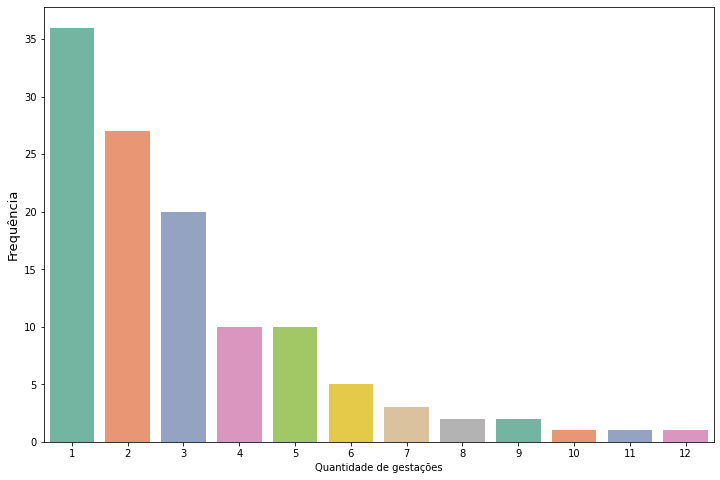

In [ ]:
ax = sns.countplot(df.Gesta, palette="Set2")
ax.figure.set_size_inches(12, 8)
ax.set_ylabel('Frequência', fontsize= 13)
ax.set_xlabel('Quantidade de gestações')
#ax.set_xticklabels(['Funcionário','Ex-Funcionário'], fontsize=13)
ax

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


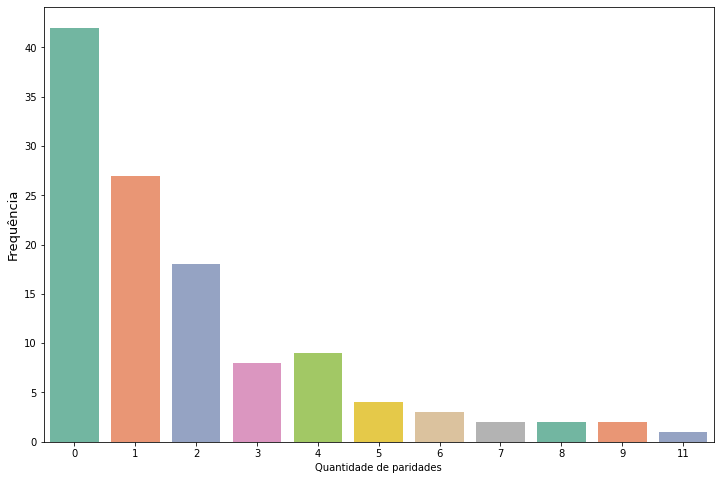

In [ ]:
ax = sns.countplot(df.Paridade, palette="Set2")
ax.figure.set_size_inches(12, 8)
ax.set_ylabel('Frequência', fontsize= 13)
ax.set_xlabel('Quantidade de paridades')
#ax.set_xticklabels(['Funcionário','Ex-Funcionário'], fontsize=13)
ax

##Apresentação da relação entre 2 variáveis qualitativas

In [ ]:
quali = df[['Passado de malária','Est.Civ.','Trimestre']].copy()
quali = quali.rename(columns={'Est.Civ.': 'Estado Civil'})
quali.head()

,Passado de malária,Estado Civil,Trimestre
0,vivax,União Estável,3
1,Mista,União Estável,3
2,vivax,Casado,2
3,Mista,União Estável,3
4,falciparum,Solteiro,3


###Relação entre estado civil e passado da malária

In [ ]:
quali_crosstab = pd.crosstab(quali['Estado Civil'],
                             quali['Passado de malária'],
                             margins=True,
                             margins_name='Total',
                             normalize=True)
quali_crosstab

Passado de malária,Mista,falciparum,vivax,Total
Estado Civil,,,,
Casado,0.008621,0.051724,0.232759,0.293103
Solteiro,0.000000,0.034483,0.146552,0.181034
União Estável,0.034483,0.043103,0.448276,0.525862
Total,0.043103,0.129310,0.827586,1.000000


Notas:
1. Se destaca a quantidade de indivíduos com vivax na amostra, sendo 96 (82,75%) de um total de 116 observações.
2. Dito isso, para todos os estados civis, o passado de malária vivax é o que tem maior quantidade.
3. Já o passado de malária falciparum tem uma quantidade consideravelmente menor de casos em relação ao vivax, sendo 15 (12,93%) no total.
4. Há 5 indivíduos na amostra (4,31%) que apresentam ambos os passados de malária, falciparum e vivax.
4. Levando em consideração o estado civil, a união estável é a variável que possui maior quantidade de algum passado de malária, sendo 61 (52,59%) no total. Seguido de casados com 34 indivíduos (29,31%) e solteiros com 21 (18,10%).
5. O banco de dados possui 118 observações, logo, conclui-se que há dois valores nulos na variável passado de malária. Convém, posteriormente, fazer um estudo a respeito desses dados nulos.

##Apresentação da relação entre uma variável qualitativa com uma quantitativa

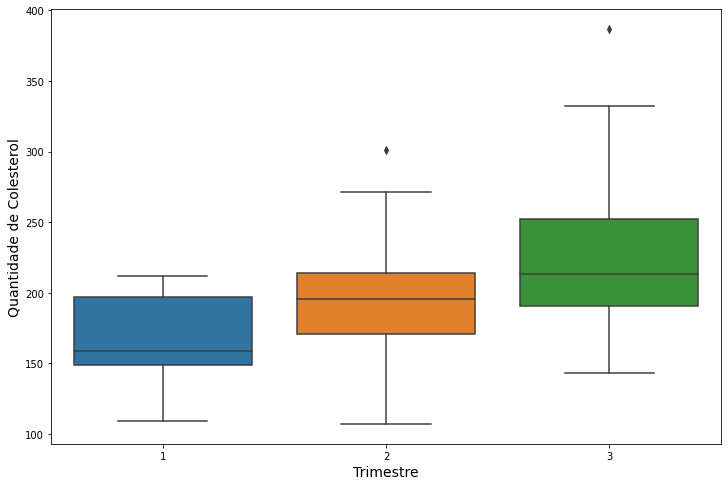

In [ ]:
ax = sns.boxplot(x='Trimestre', y='Colester', data=df)
ax.figure.set_size_inches(12,8)
ax.set_xlabel('Trimestre', fontsize=14)
ax.set_ylabel('Quantidade de Colesterol', fontsize=14)
ax;

Por meio do boxplot apresentado é possível notar que há uma diferença do trimestre de gestação em relação a quantidade de colesterol. É notório o aumento do colesterol de acordo com o passar dos trimestres. Junto a isso, é importante ressaltar que há um valor extremo no 2° trimestre, que chega a 300 de quantidade de colesterol e outro no 3° que chega a um valor próximo de 390 de colesterol e deve ser estudado mais profundamente.


# Problematização



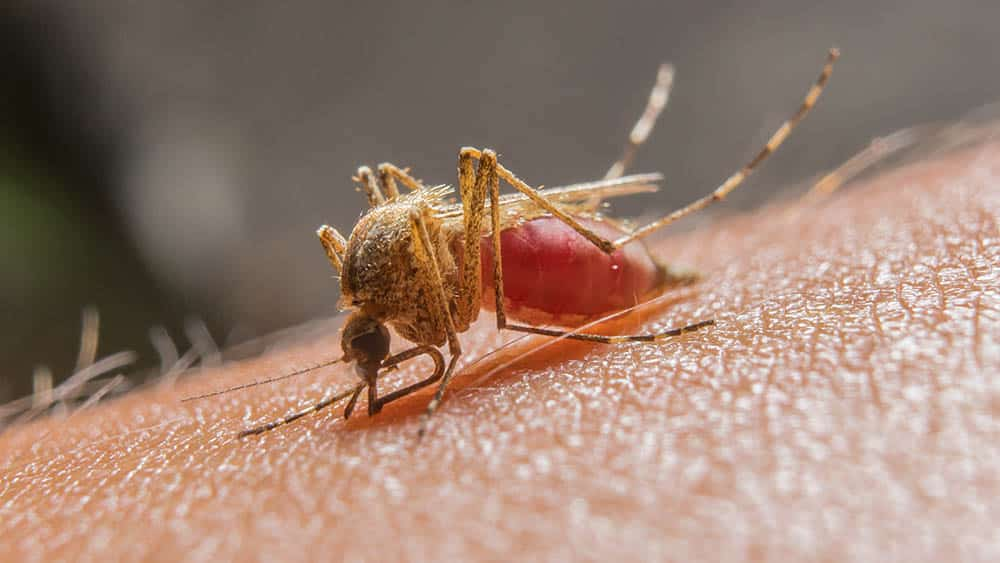

A malária mais agressiva é o P. falciparum, que se multiplica rapidamente na corrente sanguínea, destruindo de 2% a 25% do total de hemácias (glóbulos vermelhos) e provocando um quadro de anemia grave. Porisso, a malária por P. falciparum é considerada uma emergência médica e o seu tratamento deve ser iniciado nas primeiras 24h do início da febre.

A malária Vivax, de modo geral, causa um tipo de malária mais branda, que não atinge mais do que 1% das hemácias, e é raramente mortal. No entanto, seu tratamento pode ser mais complicado, já que o Vivax se aloja por mais tempo no fígado, dificultando sua eliminação.

Dito isto, irei modelar para prever se as mulheres gestantes tem mais chances de buscarem o hospital por estar com a malária mais agressiva (Falciparum), pela menos agressiva (Vivax) ou por ambas.


#pré-processamento

In [ ]:
df = df.drop('Pront+A1:Q146uario', axis=1) #excluindo id
df = df.dropna()

In [ ]:
df.head()

,idade,Passado de malária,Est.Civ.,Renda salario mínimo,Malárias,Gesta,Paridade,Trimestre,Hemoglob.,Hematóc,Plaquetas,Colester,Triglic,LDL,HDL,VLDL
0,17,vivax,União Estável,1,0,3,2,3,7.9,27.1,144,286,235,186,65,47
1,24,Mista,União Estável,2,2,3,2,3,10.0,32.9,274,188,220,82,71,44
2,29,vivax,Casado,1,2,7,6,2,10.8,35.6,258,233,136,154,57,27
3,40,Mista,União Estável,1,3,12,11,3,10.4,33.9,169,196,192,98,64,38
4,17,falciparum,Solteiro,2,1,1,0,3,13.3,38.4,296,163,340,56,46,68


In [ ]:
df['Passado de malária'].unique()

array(['vivax', 'Mista ', 'falciparum'], dtype=object)

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [ ]:
#transformando dados categóricos em numéricos
for column in df[['Est.Civ.','Passado de malária']]:
  if df[column].dtype != np.number:
    df[column] = LabelEncoder().fit_transform(df[column])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  This is separate from the ipykernel package so we can avoid doing imports until


mista = 0 

falciparum = 1

vivax = 2


In [ ]:
#libs
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [ ]:
#dividindo a variável dependente e independentes

x = df.drop('Passado de malária', axis=1)
y = df['Passado de malária']

In [ ]:
#verificando se meu Y está balanceado

y.value_counts()

2    96
1    15
0     5
Name: Passado de malária, dtype: int64

Como Y não está balanceado, irei optar por usar árvore de decisão e por avalia-la por meio da curva roc (como baseline)

In [ ]:
xtrain, xval, ytrain, yval = train_test_split(x, y, test_size = 0.3, random_state=1)
model = DecisionTreeClassifier(class_weight = {0: 0.05, 1: 0.14, 2:0.81}) #instanciando
model.fit(xtrain, ytrain) #treinando

pred = model.predict_proba(xval) #prevendo probabilidade


In [ ]:
roc_auc_score(yval, pred, multi_class='ovr')

0.5627394636015325

Na tentativa de simplificar a análise da ROC, a AUC (“area under the ROC curve”) nada mais é que uma maneira de resumir a curva ROC em um único valor, agregando todos os limiares da ROC, calculando a “área sob a curva”.


O valor do AUC varia de 0,0 até 1,0 e o limiar entre a classe é 0,5. Ou seja, acima desse limite, o algoritmo classifica em uma classe e abaixo na outra classe.

Quanto maior o AUC, melhor.



#2°Passo: Otimização

##tratando os dados desbalanceados.

### Undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler, NearMiss, OneSidedSelection


In [ ]:
nm = NearMiss(version=1)
X_nm_res, y_nm_res = nm.fit_resample(x, y)

In [ ]:
y_nm_res.value_counts()

0    5
1    5
2    5
Name: Passado de malária, dtype: int64

Não tão útil nesse caso pois acabo perdendo muita informação dos dados, mas dependendo do problema de negócio e base de dados, pode ser mais adequada!

### Oversampling com SMOTE

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE


In [ ]:
smote = SMOTE(random_state = 32,k_neighbors=4)
x_smote_res, y_smote_res = smote.fit_resample(x, y)

In [ ]:
y_smote_res.value_counts()

2    96
0    96
1    96
Name: Passado de malária, dtype: int64

###cross-validate

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate

In [ ]:
model = DecisionTreeClassifier(class_weight = {0: 0.05, 1: 0.14, 2:0.81}) 
results_smote = cross_val_score(model.fit(x_smote_res, y_smote_res),
                               x_smote_res, y_smote_res,
                               cv=5, scoring='roc_auc_ovr_weighted')

In [ ]:
np.mean(results_smote)

0.8308367071524966

Pôde-se observar uma melhora com relação ao baseline criado anteriormente.